<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo">
</center>


# Machine Learning Foundation

## Section 2, Part a: Regression Intro: Transforming Target 


## Learning objectives

By the end of this lesson, you will be able to:

* Apply transformations to make target variable more normally distributed for Regression
* Apply inverse transformations to be able to use these in a Regression context


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In the following cells we will load the data and define some useful plotting functions.


In [2]:
np.random.seed(72018)


def to_2d(array):
    return array.reshape(array.shape[0], -1)
    
def plot_exponential_data():
    data = np.exp(np.random.normal(size=1000))
    plt.hist(data)
    plt.show()
    return data
    
def plot_square_normal_data():
    data = np.square(np.random.normal(loc=5, size=1000))
    plt.hist(data)
    plt.show()
    return data

### Loading the Boston Housing Data


In [3]:
file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_data = pd.read_csv(file_name)

In [4]:
boston_data.head(10)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


### Determining Normality


Making our target variable normally distributed often will lead to better results

If our target is not normally distributed, we can apply a transformation to it and then fit our regression to predict the transformed values.

How can we tell if our target is normally distributed? There are two ways:

* Using a Visual approach
* Using a Statistical Test


#### Using a Visual approach


#### Plotting a histogram:


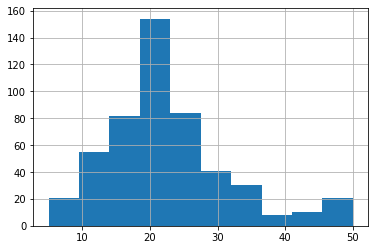

In [5]:
boston_data.MEDV.hist();

The histogram does not look normal due to its right tail.


#### Using a Statistical Test


Without getting into Bayesian vs. frequentist debates, for the purposes of this lesson, the following will suffice:

* This is a statistical test that tests whether a distribution is normally distributed or not. It isn't perfect, but suffice it to say: 
    * This test outputs a **p-value**. The _higher_ this p-value is the _closer_ the distribution is to normal.
    * Frequentist statisticians would say that you accept that the distribution is normal (more specifically: fail to reject the null hypothesis that it is normal) if p > 0.05.


In [7]:
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test

In [12]:
from scipy.stats.mstats import normaltest
alpha = .05 # if p value bigger than this value, then it can be treated as normal distributed
s, p = normaltest(boston_data.MEDV.values)
p
if p>alpha:
    print("Normal ditributuion")
else:
    print("Not Normal distribution")

Not Normal distribution


p-value is _extremely_ low. Our **y** variable which we have been dealing with this whole time was not normally distributed!


### Apply transformations to make target variable more normally distributed for Regression


Linear Regression assumes a normally distributed residuals which can be aided by transforming **y** variable which is the target variable. Let's try some common transformations to try and get **y** to be normally distributed: 

* Log Transformation
* Square root Transformation
* Box cox Transformation


### Log Transformation


The log transformation can transform data that is significantly skewed right to be more normally distributed:


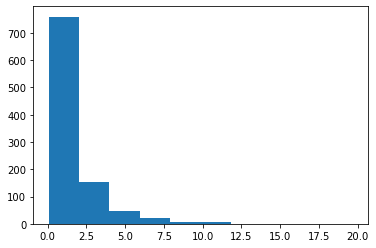

In [13]:
data = plot_exponential_data()

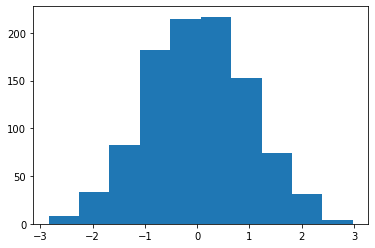

In [14]:
plt.hist(np.log(data));

**Apply transformation to Boston Housing data:**


In [15]:
log_medv = np.log(boston_data.MEDV)

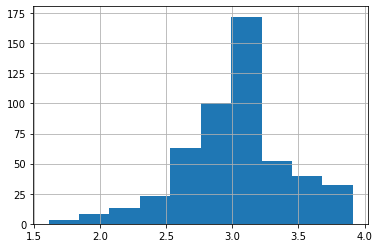

In [16]:
log_medv.hist();

In [17]:
normaltest(log_medv)

NormaltestResult(statistic=17.21801696640697, pvalue=0.00018245472768345307)

Conclusion: The output is closer to normal distribution, but still not completely normal.


### Square root Transformation

The square root transformation is another transformation that can transform non-normally distributed data into normally distributed data:


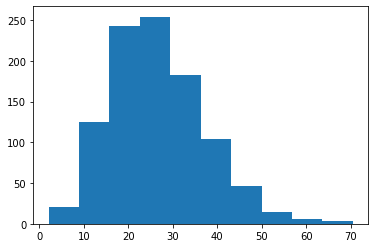

In [18]:
data = plot_square_normal_data()

You may notice that the output still exhibits a slight right skew.


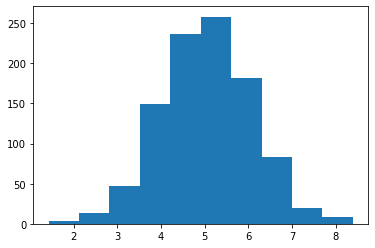

In [19]:
plt.hist(np.sqrt(data));

#### Exercise


Apply the square root transformation to the Boston Housing data target and test whether the result is normally distributed.


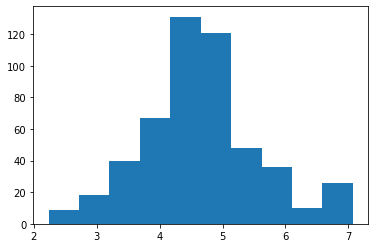

In [23]:
## Enter your code here
sqrt_medv = np.sqrt(boston_data.MEDV)
_ = plt.hist(sqrt_medv)

<details><summary>Click here for a sample python solution</summary>

```python
sqrt_medv = np.sqrt(boston_data.MEDV)
plt.hist(sqrt_medv)

```


In [24]:
normaltest(sqrt_medv)

NormaltestResult(statistic=20.487090826863067, pvalue=3.558645701429252e-05)

### Box cox Transformation


The box cox transformation is a parametrized transformation that tries to get distributions "as close to a normal distribution as possible".

It is defined as:

$$ \text{boxcox}(y_i) = \frac{y_i^{\lambda} - 1}{\lambda} $$

You can think of as a generalization of the square root function: the square root function uses the exponent of 0.5, but box cox lets its exponent vary so it can find the best one.


In [25]:
from scipy.stats import boxcox

In [26]:
bc_result = boxcox(boston_data.MEDV)
boxcox_medv = bc_result[0]
lam = bc_result[1]

In [27]:
lam

0.2166209012915364

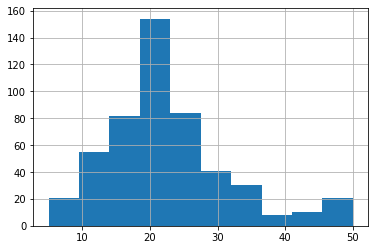

In [28]:
boston_data['MEDV'].hist();

In [70]:
import seaborn as sns

<AxesSubplot:ylabel='Count'>

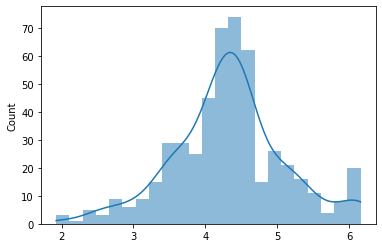

In [71]:
# plt.hist(boxcox_medv)
sns.histplot(data=boxcox_medv, kde=True, edgecolor=None)

In [30]:
normaltest(boxcox_medv)

NormaltestResult(statistic=4.513528775533045, pvalue=0.1046886692817602)

We find that the box cox results in a graph which is significantly more normally distributed (according to p value) than the other two distributions.This can be even above 0.05.

Now that we have a normally distributed y-variable, let's test Regression using this transformed target variables.


### Testing regression:


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, 
                                   PolynomialFeatures)

In [34]:
lr = LinearRegression()

**Define and load the predictor (X) and Target(y) variables**


In [35]:
y_col = "MEDV"

X = boston_data.drop(y_col, axis=1)
y = boston_data[y_col]


**Create Polynomial Features**


In [36]:
pf = PolynomialFeatures(degree=2, include_bias=False)
X_pf = pf.fit_transform(X)

In [37]:
pf.get_feature_names_out()

array(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
       'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'Unnamed: 0^2',
       'Unnamed: 0 CRIM', 'Unnamed: 0 ZN', 'Unnamed: 0 INDUS',
       'Unnamed: 0 CHAS', 'Unnamed: 0 NOX', 'Unnamed: 0 RM',
       'Unnamed: 0 AGE', 'Unnamed: 0 DIS', 'Unnamed: 0 RAD',
       'Unnamed: 0 TAX', 'Unnamed: 0 PTRATIO', 'Unnamed: 0 LSTAT',
       'CRIM^2', 'CRIM ZN', 'CRIM INDUS', 'CRIM CHAS', 'CRIM NOX',
       'CRIM RM', 'CRIM AGE', 'CRIM DIS', 'CRIM RAD', 'CRIM TAX',
       'CRIM PTRATIO', 'CRIM LSTAT', 'ZN^2', 'ZN INDUS', 'ZN CHAS',
       'ZN NOX', 'ZN RM', 'ZN AGE', 'ZN DIS', 'ZN RAD', 'ZN TAX',
       'ZN PTRATIO', 'ZN LSTAT', 'INDUS^2', 'INDUS CHAS', 'INDUS NOX',
       'INDUS RM', 'INDUS AGE', 'INDUS DIS', 'INDUS RAD', 'INDUS TAX',
       'INDUS PTRATIO', 'INDUS LSTAT', 'CHAS^2', 'CHAS NOX', 'CHAS RM',
       'CHAS AGE', 'CHAS DIS', 'CHAS RAD', 'CHAS TAX', 'CHAS PTRATIO',
       'CHAS LSTAT', 'NOX^2', 'NOX RM', 'NOX AGE', 'NOX DIS'

**Split the data into Training and Test Sets**   

The split ratio here is 0.7 and 0.3 which means we will assign **70%** data for training and **30%** data for testing


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.3, 
                                                    random_state=72018)

**Normalize the training data using `StandardScaler` on `X_train`. Use fit_transform() function**


In [39]:
s = StandardScaler()
X_train_s = s.fit_transform(X_train)

**Discuss: what transformation do we need to apply next?**

Apply the appropriate transformation.


In [54]:
# Enter your code here
y_train_bc, y_lam = boxcox(y_train)

<AxesSubplot:ylabel='Count'>

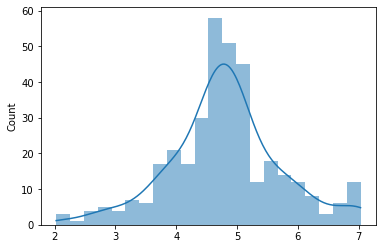

In [73]:
# _ = plt.hist(y_train_bc)
sns.histplot(data=y_train_bc, kde=True, edgecolor=None)

In [56]:
normaltest(y_train_bc)

NormaltestResult(statistic=4.907008889573977, pvalue=0.08599170466308013)

<details><summary>Click here for a sample python solution</summary>

```python
    
bc_result2 = boxcox(y_train)
y_train_bc = bc_result2[0]
lam2 = bc_result2[1]

```


As before, we'll now:

1. Fit regression
1. Transform testing data
1. Predict on testing data


In [57]:
y_train_bc.shape

(354,)

In [58]:
lr.fit(X_train_s, y_train_bc)
X_test_s = s.transform(X_test)
y_pred_bc = lr.predict(X_test_s)

In [65]:
X_test_s.shape

(152, 104)

### Discussion

* Are we done?
* What did we predict?
* How would you interpret these predictions?


#### Apply inverse transformations to be able to use these in a Regression context


Every transformation has an inverse transformation. The inverse transformation of $f(x) = \sqrt{x}$ is $f^{-1}(x) = x^2$, for example. Box cox has an inverse transformation as well: notice that we have to pass in the lambda value that we found from before:


In [59]:
from scipy.special import inv_boxcox
import scipy.special.inv_boxcox

In [52]:
inv_boxcox(boxcox_medv, lam)[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [53]:
boston_data['MEDV'].values[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

Exactly the same, as we would hope!


### Exercise:

1. Apply the appropriate inverse transformation to `y_pred_bc`.
2. Calculate the $R^2$ using the result of this inverse transformation and `y_test`.  

**Hint:** Use the **inv_boxcox()** function to get the transformed predicted values


In [60]:
#Enter your code here
y_hat_inv = inv_boxcox(y_pred_bc, y_lam)

In [61]:
r2_score(y_test,y_hat_inv)

0.8714547467412758

<details><summary>Click here for a sample python solution</summary>

```python
y_pred_tran = inv_boxcox(y_pred_bc,lam2)
r2_score(y_test,y_pred_tran)

```


## Practice Exercise: 

### Determine the R^2 of a LinearRegression without the box cox transformation.


In [63]:
y_test.shape

(152,)

In [66]:
# Enter your code here
lr = LinearRegression()
lr = lr.fit(X_train, y_train)
y_hat = lr.predict(X_test)
r2_score(y_hat, y_test)

0.8667029116044115

<details><summary>Click here for a sample python solution</summary>

```python
lr = LinearRegression()
lr.fit(X_train_s,y_train)
lr_pred = lr.predict(X_test_s)
r2_score(y_test,lr_pred)

```


---
## Authors:

Niveditha


## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2023-10-11 | 1.0 |Niveditha | Updated the notebook |




<hr/>

## <h3 align="center"> © IBM Corporation 2023. All rights reserved. <h3/>
